# Face Recognition

In this notebook, I will be training an object detection model to detect faces. The dataset used here is [WIDER Face](http://shuoyang1213.me/WIDERFACE/) dataset.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random

import torch
from torchvision import utils
import numpy as np

from dataset import get_dataloader
from utils import show, load_checkpoint, export_to_onnx
import models

from face_recognition import train, test

In [3]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
# torch.use_deterministic_algorithms(True)

In [4]:
LOAD_CHECKPOINT = True
checkpoint_path = 'models/checkpoint.pt'

### Load data

Load the training and validation data from dataset. And a few sample images can be see below

In [5]:
def show_sample(data):
    images, targets = next(iter(data))
    outputs = []
    for image, target in zip(images, targets):
        outputs.append(utils.draw_bounding_boxes((image * 255).type(torch.uint8), target['boxes'], width=3, colors='red'))
    show(outputs, rows = 2, cols = 2, figsize = (16, 8))

In [6]:
train_data = get_dataloader('data/WIDER_train/images/', 
                            'data/wider_face_split/wider_face_train_bbx_gt.txt', batch_size=4)
val_data = get_dataloader('data/WIDER_val/images/', 
                          'data/wider_face_split/wider_face_val_bbx_gt.txt', batch_size=4)

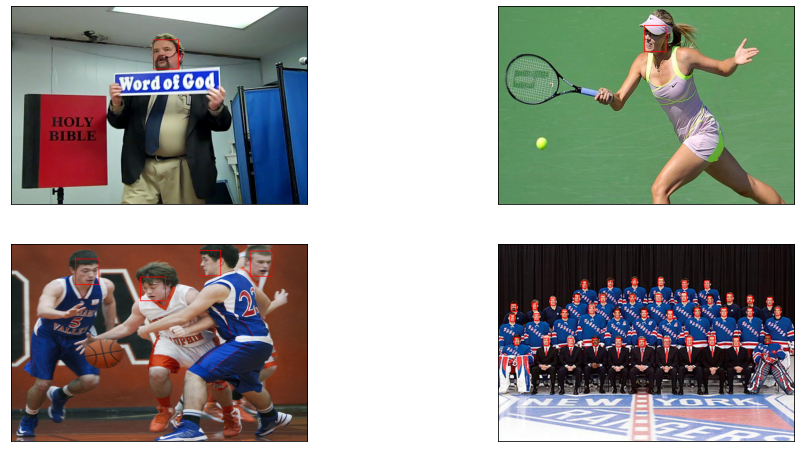

In [8]:
show_sample(train_data)

In [5]:
model = models.get_model()

In [6]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)
# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)
epoch = -1

In [7]:
if LOAD_CHECKPOINT:
    model, optimizer, scheduler, epoch, loss = load_checkpoint(checkpoint_path, model, optimizer,
                    lr_scheduler)

In [10]:
print("Currently doing epoch:", epoch)

Currently doing epoch: 12


In [9]:
train(train_data, val_data, model, optimizer, lr_scheduler, epoch + 1, 2)

/home/studio-lab-user/.conda/envs/dl/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272068694/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Batch: 500 Loss: 93.56962862797081
Batch: 1000 Loss: 186.51442175917327
Batch: 1500 Loss: 278.7857570555061
Batch: 2000 Loss: 370.0433990377933
Batch: 2500 Loss: 460.0325405076146
Batch: 3000 Loss: 552.0446335654706
Batch: 500 Loss: 94.75444230251014
Batch: 1000 Loss: 188.34152643196285
Batch: 1500 Loss: 284.51193082146347
Batch: 2000 Loss: 382.0557574275881
Batch: 2500 Loss: 475.0018438939005
Batch: 3000 Loss: 565.742316627875
Batch: 500 Loss: 93.91848536580801
Batch: 1000 Loss: 187.44347961619496
Batch: 1500 Loss: 282.44719367846847
Batch: 2000 Loss: 374.33357542566955
Batch: 2500 Loss: 472.8826868068427
Batch: 3000 Loss: 569.3848599549383


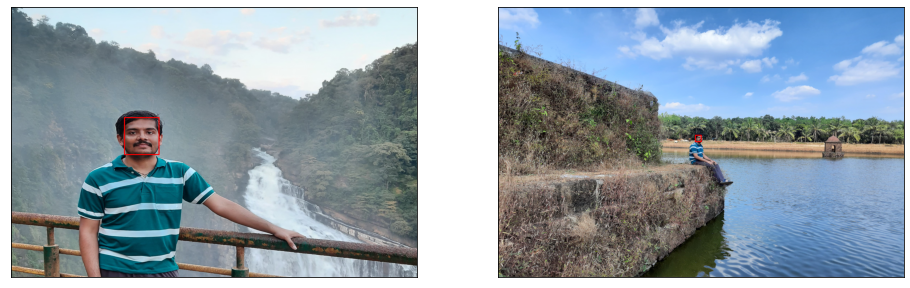

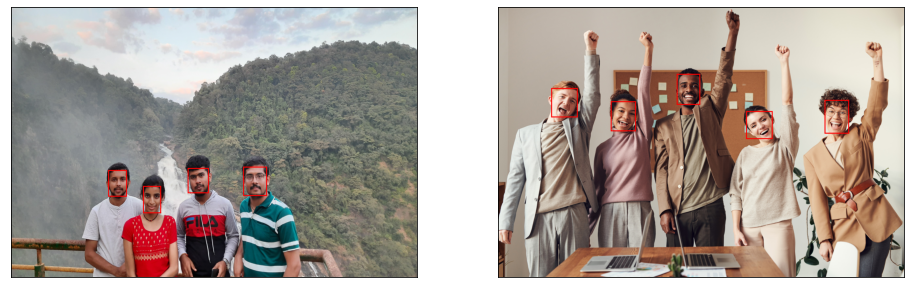

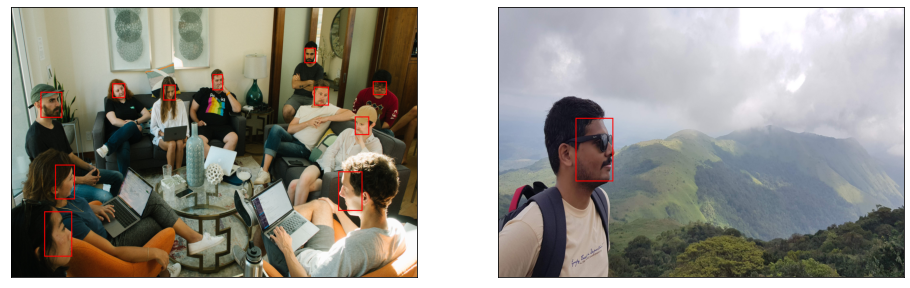

In [11]:
test_data = get_dataloader('data/test/', batch_size=2, demo=True)
test(model, test_data)

[Photo by fauxels from Pexels](https://www.pexels.com/photo/multi-cultural-people-3184419/)
[Photo by Athena from Pexels](https://www.pexels.com/photo/group-of-people-sitting-on-sofa-while-discussing-2962135/)

In [16]:
export_to_onnx(model, 'models/face-detection.onnx')

graph(%input : Float(*, 3, 800, 1200, strides=[2880000, 960000, 1200, 1], requires_grad=0, device=cpu),
      %rpn.head.conv.weight : Float(1280, 1280, 3, 3, strides=[11520, 9, 3, 1], requires_grad=1, device=cpu),
      %rpn.head.conv.bias : Float(1280, strides=[1], requires_grad=1, device=cpu),
      %rpn.head.cls_logits.weight : Float(15, 1280, 1, 1, strides=[1280, 1, 1, 1], requires_grad=1, device=cpu),
      %rpn.head.cls_logits.bias : Float(15, strides=[1], requires_grad=1, device=cpu),
      %rpn.head.bbox_pred.weight : Float(60, 1280, 1, 1, strides=[1280, 1, 1, 1], requires_grad=1, device=cpu),
      %rpn.head.bbox_pred.bias : Float(60, strides=[1], requires_grad=1, device=cpu),
      %roi_heads.box_head.fc6.weight : Float(1024, 62720, strides=[62720, 1], requires_grad=1, device=cpu),
      %roi_heads.box_head.fc6.bias : Float(1024, strides=[1], requires_grad=1, device=cpu),
      %roi_heads.box_head.fc7.weight : Float(1024, 1024, strides=[1024, 1], requires_grad=1, device=cpu),